In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Survival_Dataset_Final.csv')

In [6]:
df.head()

encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   

   ethnicity gender  height           icu_admit_source  ...  \
0  Caucasian      M   180.3                      Floor  ...   
1  Caucasian      F   160.0                      Floor  ...   
2  Caucasian      F   172.7       Accident & Emergency  ...   
3  Caucasian      F   165.1  Operating Room / Recovery  ...   
4  Caucasian      M   188.0       Accident & Emergency  ...   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
0                          0.0                Sepsis       Cardiovascular   
1                          0.0           Respiratory          Respiratory   
2                          0.0             Metabolic            Metabolic   
3                          0.0        Cardiovascular       Cardiovascular   
4                          0.0                Trauma               Trauma   

   Unnamed: 83  hospital_death  
0          NaN               0  
1          NaN               0  
2          NaN               0  
3          NaN               0  
4          NaN               0  

[5 rows x 85 columns]

In [7]:
df.describe()

encounter_id     patient_id   hospital_id           age           bmi  \
count   91713.000000   91713.000000  91713.000000  87485.000000  88284.000000   
mean    65606.079280   65537.131464    105.669262     62.309516     29.185818   
std     37795.088538   37811.252183     62.854406     16.775119      8.275142   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     32852.000000   32830.000000     47.000000     52.000000     23.641975   
50%     65665.000000   65413.000000    109.000000     65.000000     27.654655   
75%     98342.000000   98298.000000    161.000000     75.000000     32.930206   
max    131051.000000  131051.000000    204.000000     89.000000     67.814990   

       elective_surgery        height        icu_id  pre_icu_los_days  \
count      91713.000000  90379.000000  91713.000000      91713.000000   
mean           0.183736    169.641588    508.357692          0.835766   
std            0.387271     10.795378    228.989661          2.487756   
min            0.000000    137.200000     82.000000        -24.947222   
25%            0.000000    162.500000    369.000000          0.035417   
50%            0.000000    170.100000    504.000000          0.138889   
75%            0.000000    177.800000    679.000000          0.409028   
max            1.000000    195.590000    927.000000        159.090972   

             weight  ...          aids     cirrhosis  diabetes_mellitus  \
count  88993.000000  ...  90998.000000  90998.000000       90998.000000   
mean      84.028340  ...      0.000857      0.015693           0.225192   
std       25.011497  ...      0.029265      0.124284           0.417711   
min       38.600000  ...      0.000000      0.000000           0.000000   
25%       66.800000  ...      0.000000      0.000000           0.000000   
50%       80.300000  ...      0.000000      0.000000           0.000000   
75%       97.100000  ...      0.000000      0.000000           0.000000   
max      186.000000  ...      1.000000      1.000000           1.000000   

       hepatic_failure  immunosuppression      leukemia      lymphoma  \
count     90998.000000       90998.000000  90998.000000  90998.000000   
mean          0.012989           0.026165      0.007066      0.004132   
std           0.113229           0.159628      0.083763      0.064148   
min           0.000000           0.000000      0.000000      0.000000   
25%           0.000000           0.000000      0.000000      0.000000   
50%           0.000000           0.000000      0.000000      0.000000   
75%           0.000000           0.000000      0.000000      0.000000   
max           1.000000           1.000000      1.000000      1.000000   

       solid_tumor_with_metastasis  Unnamed: 83  hospital_death  
count                 90998.000000          0.0    91713.000000  
mean                      0.020638          NaN        0.086302  
std                       0.142169          NaN        0.280811  
min                       0.000000          NaN        0.000000  
25%                       0.000000          NaN        0.000000  
50%                       0.000000          NaN        0.000000  
75%                       0.000000          NaN        0.000000  
max                       1.000000          NaN        1.000000  

[8 rows x 78 columns]

In [9]:
df.isnull().sum().sort_values(ascending = False)

Unnamed: 83               91713
d1_potassium_max           9585
d1_potassium_min           9585
h1_mbp_noninvasive_min     9084
h1_mbp_noninvasive_max     9084
                          ...  
icu_stay_type                 0
icu_id                        0
elective_surgery              0
hospital_id                   0
hospital_death                0
Length: 85, dtype: int64

In [10]:
#duplicates
df.duplicated().sum()

0

In [11]:
df.shape

(91713, 85)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [13]:
#dropping id columns and unmaned: 83
## here we have dropped the columns/features having no null values to prevent taking them into consideration while data cleaning.
df.drop(['encounter_id','patient_id','hospital_id','Unnamed: 83'],axis=1,inplace =True)

In [14]:
df.shape

(91713, 81)

Mortality rate:
The estimated total number of deaths in a population of a given sex and/or age, divided by the total number of this population, expressed per 100,000 population, for a given year, in a given country, territory, or geographic area.

<Axes: title={'center': 'Mortality in hospital in %'}, ylabel='hospital_death'>

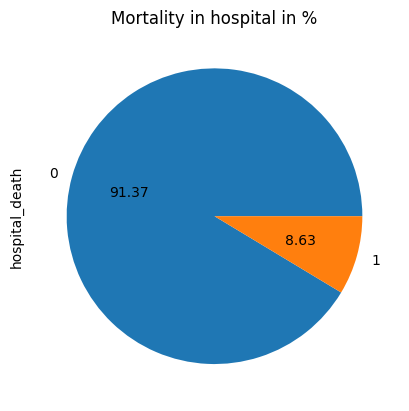

In [15]:
df.hospital_death.value_counts().plot(kind='pie',autopct="%.2f",title ='Mortality in hospital in %')

#In the dataset exist around 8.5% mortality class(1). So we have unbalanced classes in this case.

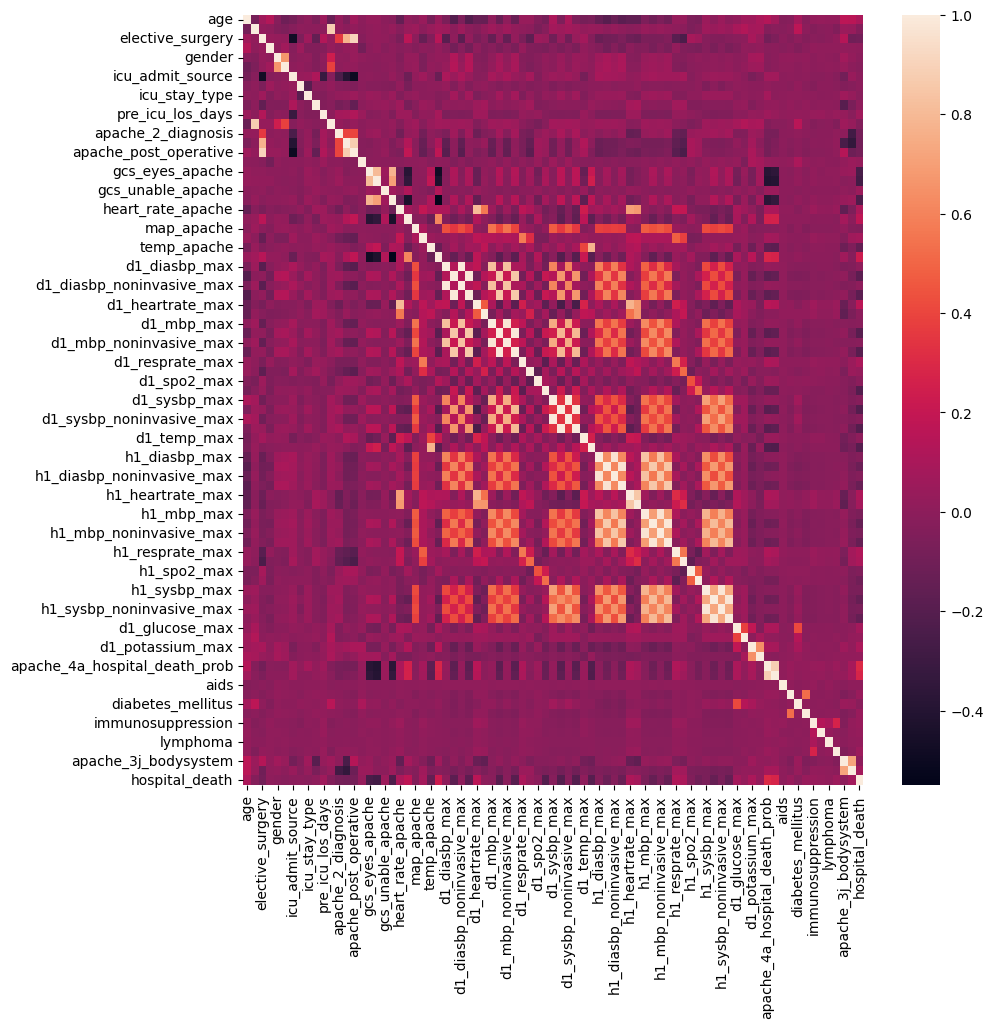

In [70]:
plt.figure(figsize=(10,10))
_=sns.heatmap(df.corr())

In [19]:
fig = px.histogram(df[['age','gender','hospital_death','bmi']].dropna(), x="age", y="hospital_death", color="gender",
                   marginal="box", 
                   hover_data=df[['age','gender','hospital_death','bmi']].columns)
fig.show()

In [20]:
#numerical clumns
num_cols=[]
for col in df.columns:
    if (df[col].dtype==int)or (df[col].dtype==float):
        num_cols.append(col)
num_cols

['age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mb

In [21]:
#cat clumns
cat_cols=[]
for col in df.columns:
    if (df[col].dtype==object):
        cat_cols.append(col)
cat_cols

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [22]:
#filling null numerical with mean and null caterocical with mode
for col in df.columns:
    if col in num_cols :
        df[col].fillna(df[col].median(), inplace=True)

for col in df.columns:
    if col in cat_cols:
        df[col].fillna(df[col].mode(), inplace=True)

In [23]:
df.describe()


age           bmi  elective_surgery        height  \
count  91713.000000  91713.000000      91713.000000  91713.000000   
mean      62.433548     29.128570          0.183736    169.648256   
std       16.393595      8.124165          0.387271     10.716719   
min       16.000000     14.844926          0.000000    137.200000   
25%       53.000000     23.787760          0.000000    162.560000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.653061          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days        weight  apache_2_diagnosis  \
count  91713.000000      91713.000000  91713.000000        91713.000000   
mean     508.357692          0.835766     83.917765          184.252789   
std      228.989661          2.487756     24.645926           85.686007   
min       82.000000        -24.947222     38.600000          101.000000   
25%      369.000000          0.035417     67.300000          113.000000   
50%      504.000000          0.138889     80.300000          122.000000   
75%      679.000000          0.409028     96.300000          301.000000   
max      927.000000        159.090972    186.000000          308.000000   

       apache_3j_diagnosis  apache_post_operative  ...  \
count         91713.000000           91713.000000  ...   
mean            556.425298               0.201106  ...   
std             460.764423               0.400829  ...   
min               0.010000               0.000000  ...   
25%             203.010000               0.000000  ...   
50%             409.020000               0.000000  ...   
75%             703.030000               0.000000  ...   
max            2201.050000               1.000000  ...   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              91713.000000  91713.000000  91713.000000   
mean                   0.041879      0.000850      0.015570   
std                    0.207821      0.029151      0.123806   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.060000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       91713.000000     91713.000000       91713.000000  91713.000000   
mean            0.223436         0.012888           0.025961      0.007011   
std             0.416551         0.112792           0.159021      0.083438   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  hospital_death  
count  91713.000000                 91713.000000    91713.000000  
mean       0.004100                     0.020477        0.086302  
std        0.063898                     0.141626        0.280811  
min        0.000000                     0.000000        0.000000  
25%        0.000000                     0.000000        0.000000  
50%        0.000000                     0.000000        0.000000  
75%        0.000000                     0.000000        0.000000  
max        1.000000                     1.000000        1.000000  

[8 rows x 74 columns]

In [24]:
df.isna().sum().sort_values(ascending  = False).head(20)

apache_2_bodysystem          1662
apache_3j_bodysystem         1662
ethnicity                    1395
icu_admit_source              112
gender                         25
age                             0
h1_heartrate_min                0
h1_spo2_max                     0
h1_resprate_min                 0
h1_resprate_max                 0
h1_mbp_noninvasive_min          0
h1_mbp_noninvasive_max          0
h1_mbp_min                      0
h1_mbp_max                      0
h1_diasbp_noninvasive_max       0
h1_heartrate_max                0
h1_diasbp_noninvasive_min       0
h1_sysbp_max                    0
h1_diasbp_min                   0
h1_diasbp_max                   0
dtype: int64

Density distribution of vars

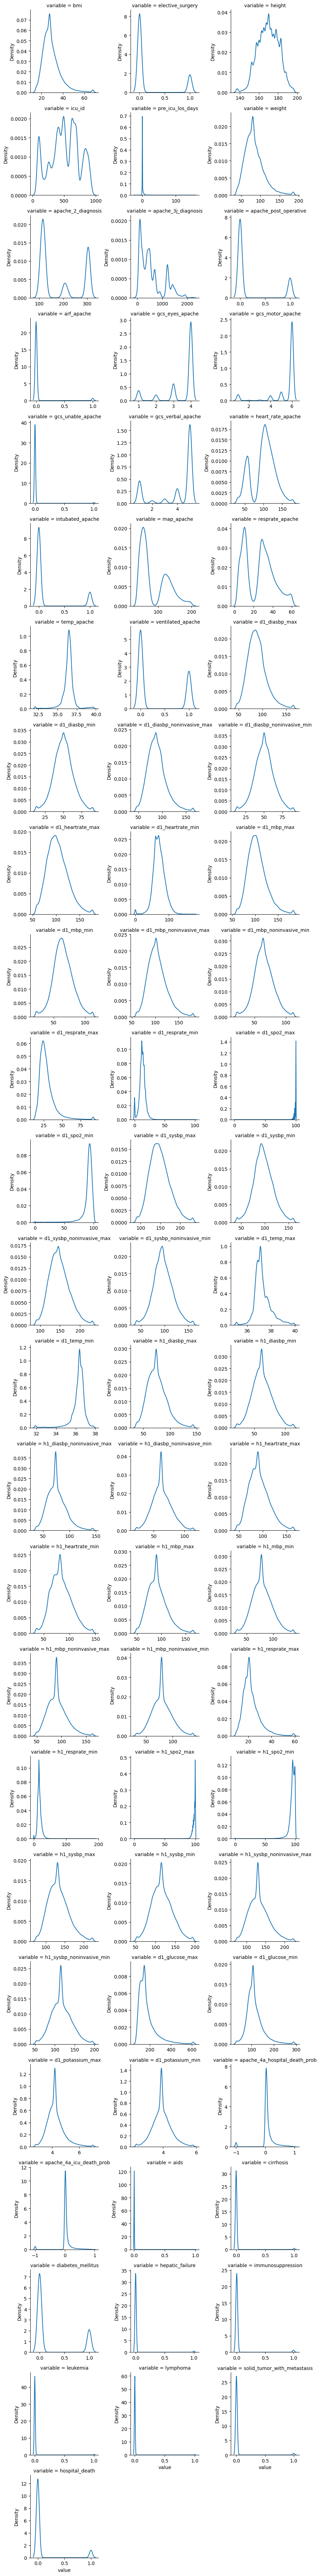

In [25]:
unpivot = pd.melt(df, df.describe().columns[0], df.describe().columns[1:])
fig = sns.FacetGrid(unpivot, col = 'variable', col_wrap = 3,
                    sharex = False, sharey = False)
fig.map(sns.kdeplot, "value")
plt.show()


# **PCA**

In [26]:
df.head()

age        bmi  elective_surgery  ethnicity gender  height  \
0  68.0  22.730000                 0  Caucasian      M   180.3   
1  77.0  27.420000                 0  Caucasian      F   160.0   
2  25.0  31.950000                 0  Caucasian      F   172.7   
3  81.0  22.640000                 1  Caucasian      F   165.1   
4  19.0  27.654655                 0  Caucasian      M   188.0   

            icu_admit_source  icu_id icu_stay_type      icu_type  ...  \
0                      Floor      92         admit         CTICU  ...   
1                      Floor      90         admit  Med-Surg ICU  ...   
2       Accident & Emergency      93         admit  Med-Surg ICU  ...   
3  Operating Room / Recovery      92         admit         CTICU  ...   
4       Accident & Emergency      91         admit  Med-Surg ICU  ...   

   cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  \
0        0.0                1.0              0.0                0.0       0.0   
1        0.0                1.0              0.0                0.0       0.0   
2        0.0                0.0              0.0                0.0       0.0   
3        0.0                0.0              0.0                0.0       0.0   
4        0.0                0.0              0.0                0.0       0.0   

   lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0       0.0                          0.0                Sepsis   
1       0.0                          0.0           Respiratory   
2       0.0                          0.0             Metabolic   
3       0.0                          0.0        Cardiovascular   
4       0.0                          0.0                Trauma   

   apache_2_bodysystem  hospital_death  
0       Cardiovascular               0  
1          Respiratory               0  
2            Metabolic               0  
3       Cardiovascular               0  
4               Trauma               0  

[5 rows x 81 columns]

In [27]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.4 MB/s eta 0:00:00


In [28]:
#encoding cat vars
from category_encoders import CountEncoder
CE = CountEncoder(normalize=True, cols=cat_cols)
df = CE.fit_transform(df)

In [29]:
#scaling df using roburst scaler which is better for oulters 
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
scale = RS.fit_transform(df)
df = pd.DataFrame(scale, columns=df.columns)

In [30]:
df.head()

age       bmi  elective_surgery  ethnicity  gender    height  \
0  0.136364 -0.555498               0.0        0.0     0.0  0.669291   
1  0.545455 -0.026469               0.0        0.0    -1.0 -0.662730   
2 -1.818182  0.484512               0.0        0.0    -1.0  0.170604   
3  0.727273 -0.565650               1.0        0.0    -1.0 -0.328084   
4 -2.090909  0.000000               0.0        0.0     0.0  1.174541   

   icu_admit_source    icu_id  icu_stay_type  icu_type  ...  cirrhosis  \
0         -1.087759 -1.329032            0.0   -1.0726  ...        0.0   
1         -1.087759 -1.335484            0.0    0.0000  ...        0.0   
2          0.000000 -1.325806            0.0    0.0000  ...        0.0   
3         -1.000000 -1.329032            0.0   -1.0726  ...        0.0   
4          0.000000 -1.332258            0.0    0.0000  ...        0.0   

   diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  lymphoma  \
0                1.0              0.0                0.0       0.0       0.0   
1                1.0              0.0                0.0       0.0       0.0   
2                0.0              0.0                0.0       0.0       0.0   
3                0.0              0.0                0.0       0.0       0.0   
4                0.0              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
0                          0.0              0.000000             0.903659   
1                          0.0             -0.006246            -0.009634   
2                          0.0             -0.195013            -0.142531   
3                          0.0              0.870596             0.903659   
4                          0.0             -0.376579            -0.270359   

   hospital_death  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 81 columns]

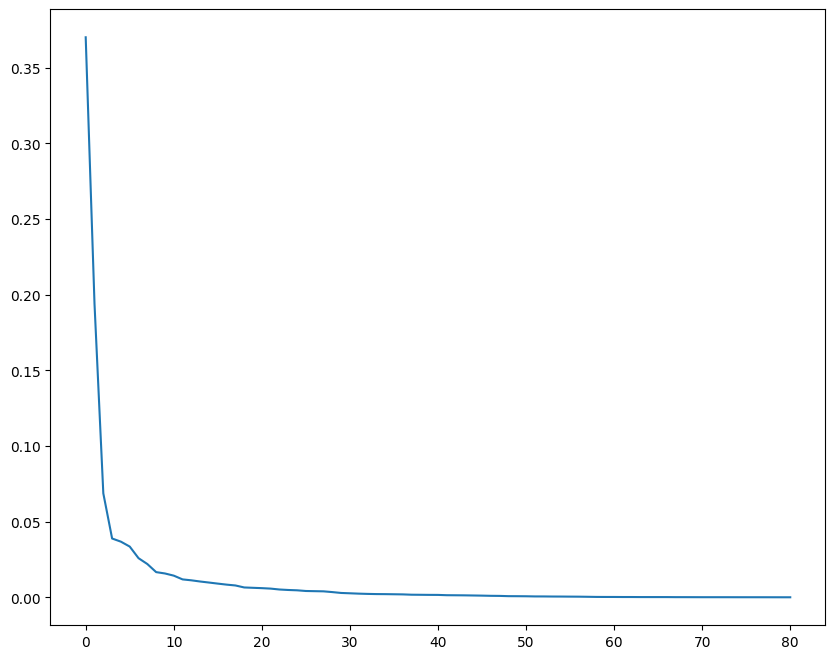

In [31]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(scale)
explained_variance_s=pca.explained_variance_ratio_
plt.figure(figsize=(10,8))
_=plt.plot(explained_variance_s)

In [32]:
for comp in range(len(df.columns)):
    pca = PCA(n_components=comp)
    X_train_pca = pca.fit_transform(scale)
    print('Total Explained Variance Ratio using {} components = {}%'.format(comp,round(np.sum(pca.explained_variance_ratio_)*100,2)))

Total Explained Variance Ratio using 0 components = 0.0%
Total Explained Variance Ratio using 1 components = 37.01%
Total Explained Variance Ratio using 2 components = 56.4%
Total Explained Variance Ratio using 3 components = 63.27%
Total Explained Variance Ratio using 4 components = 67.16%
Total Explained Variance Ratio using 5 components = 70.83%
Total Explained Variance Ratio using 6 components = 74.18%
Total Explained Variance Ratio using 7 components = 76.77%
Total Explained Variance Ratio using 8 components = 78.96%
Total Explained Variance Ratio using 9 components = 80.63%
Total Explained Variance Ratio using 10 components = 82.2%
Total Explained Variance Ratio using 11 components = 83.63%
Total Explained Variance Ratio using 12 components = 84.81%
Total Explained Variance Ratio using 13 components = 85.93%
Total Explained Variance Ratio using 14 components = 86.98%
Total Explained Variance Ratio using 15 components = 87.95%
Total Explained Variance Ratio using 16 components = 8

In [ ]:
#out of all the vars, with only using 18 columns we are able to get 90% total variance
#hence we will take only 18 components into consderation to increase out training and decrease computation for the model

In [ ]:
#models to be used 
# 1. LR
# 2. KNeighborsClassifier
# 3. DecisionTreeClassifier
# 4. RandomForestClassifier
# 5. NN
# 6. SVC

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [34]:
pca = PCA(n_components=18)
X_pca = pca.fit_transform(scale)


Test/Train Data split

In [35]:
from sklearn.model_selection import train_test_split
y = df.hospital_death
X = df.drop('hospital_death',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2,stratify=y)

In [36]:
#logistic regression
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train,y_train)
lod_reg_score = logistic_reg_model.score(X_test,y_test)

In [37]:
y_pred_lr = logistic_reg_model.predict(X_test) # Predictions


In [ ]:
#random forest

In [38]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest_score = random_forest.score(X_test,y_test)
y_pred_rf = random_forest.predict(X_test)

In [39]:
print("Accuracy of Model: ","{:.2f}".format(random_forest_score*100),'%')


Accuracy of Model:  92.62 %


In [ ]:
#KNN

In [40]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_score = KNN.score(X_test,y_test)

In [42]:
y_pred_KNN = KNN.predict(X_test)


In [43]:
print("Accuracy of Model: ","{:.2f}".format(KNN_score*100),'%')


Accuracy of Model:  92.14 %


In [ ]:
#DecisionTreeClassifier

In [44]:
Decison_Tree = DecisionTreeClassifier()
Decison_Tree.fit(X_train,y_train)
Decison_Tree_score = Decison_Tree.score(X_test,y_test)

In [45]:
y_pred_decison_tree = Decison_Tree.predict(X_test)


In [ ]:
print("Accuracy of Model: ","{:.2f}".format(Decison_Tree_score*100),'%')

In [ ]:
#SVC

In [46]:
SVC_model = SVC()
SVC_model.fit(X_train,y_train)
SVC_score = SVC_model.score(X_test,y_test)

In [47]:
y_pred_svc = SVC_model.predict(X_test)

In [48]:
print("Accuracy of Model: ","{:.2f}".format(SVC_score*100),'%')

Accuracy of Model:  92.62 %


In [ ]:
#eveluation/peformance

In [49]:
from sklearn import  metrics
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)

In [50]:
def model_performance(model, y_test, y_preds) : 
    conf_matrix = confusion_matrix(y_test, y_preds)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=1, cols=2, print_grid=False, 
                          specs=[ 
                                 [{}, {}],
                                 ],
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 500,width = 750,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))


    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [51]:
model_performance(logistic_reg_model,y_test,y_pred_lr)

In [52]:
model_performance(random_forest,y_test,y_pred_rf)

In [53]:
model_performance(KNN,y_test,y_pred_KNN)

In [54]:
model_performance(DecisionTreeClassifier,y_test,y_pred_decison_tree)

In [55]:
model_performance(SVC_model,y_test,y_pred_svc)

In [ ]:
#NN

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Accuracy, Precision, Recall

In [57]:
from keras.layers import Dropout

In [58]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy",Recall(),Precision()])

In [59]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=20, batch_size=64)

Epoch 1/20
1147/1147 [==============================] - 16s 12ms/step - loss: 0.2281 - accuracy: 0.9206 - recall: 0.2263 - precision: 0.6069 - val_loss: 0.2111 - val_accuracy: 0.9237 - val_recall: 0.1819 - val_precision: 0.7347
Epoch 2/20
1147/1147 [==============================] - 13s 12ms/step - loss: 0.2117 - accuracy: 0.9236 - recall: 0.2350 - precision: 0.6625 - val_loss: 0.2042 - val_accuracy: 0.9268 - val_recall: 0.2539 - val_precision: 0.7128
Epoch 3/20
1147/1147 [==============================] - 14s 12ms/step - loss: 0.2078 - accuracy: 0.9244 - recall: 0.2407 - precision: 0.6734 - val_loss: 0.2013 - val_accuracy: 0.9259 - val_recall: 0.3083 - val_precision: 0.6489
Epoch 4/20
1147/1147 [==============================] - 13s 12ms/step - loss: 0.2059 - accuracy: 0.9256 - recall: 0.2585 - precision: 0.6812 - val_loss: 0.2011 - val_accuracy: 0.9249 - val_recall: 0.2742 - val_precision: 0.6546
Epoch 5/20
1147/1147 [==============================] - 16s 14ms/step - loss: 0.2044 - a

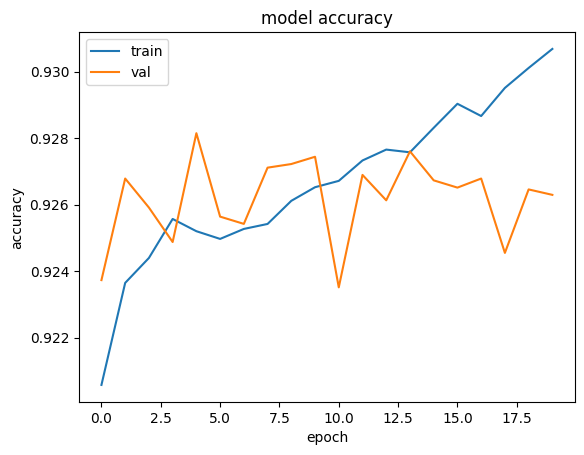

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [61]:
nn_preds = model.predict(X_test)
model_performance(model,y_test,nn_preds.round() )

574/574 [==============================] - 3s 4ms/step


In [62]:
def calculate_cumulative_count_and_rate(y_true, y_pred):
  results_df = pd.DataFrame()
  results_df['target'] = y_true
  results_df['predicted'] = y_pred
  results_df = results_df.sort_values(by='predicted', ascending=False)

  results_df['cumulative_count'] = np.arange(1, len(results_df)+1)
  results_df['cumulative_pos'] = results_df['target'].cumsum()
  results_df['cumulative_rate'] = results_df['cumulative_pos'] / results_df['target'].sum()
  return results_df[['cumulative_count','cumulative_pos','cumulative_rate','target']]

In [63]:
results_lr = calculate_cumulative_count_and_rate(y_test, y_pred_lr)
results_dt = calculate_cumulative_count_and_rate(y_test, y_pred_decison_tree)
results_rf = calculate_cumulative_count_and_rate(y_test, y_pred_rf)
results_knn = calculate_cumulative_count_and_rate(y_test, y_pred_KNN)
results_nn = calculate_cumulative_count_and_rate(y_test, nn_preds)
results_svc = calculate_cumulative_count_and_rate(y_test, y_pred_svc)

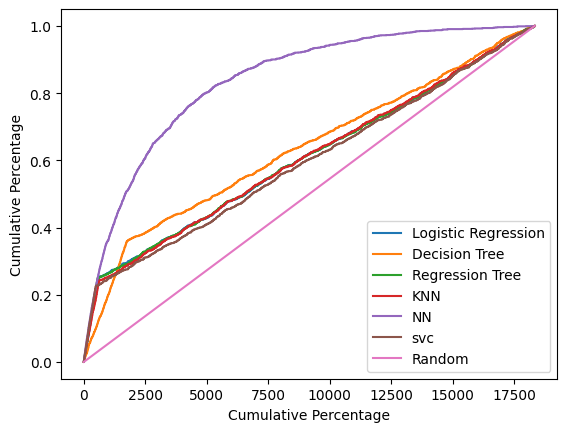

In [64]:
random_rates = np.linspace(0, 1, len(results_lr))

plt.plot(results_lr['cumulative_count'], results_lr['cumulative_rate'], label='Logistic Regression')
plt.plot(results_dt['cumulative_count'], results_dt['cumulative_rate'], label='Decision Tree')
plt.plot(results_rf['cumulative_count'], results_rf['cumulative_rate'], label='Regression Tree')
plt.plot(results_knn['cumulative_count'], results_knn['cumulative_rate'], label='KNN')
plt.plot(results_nn['cumulative_count'], results_nn['cumulative_rate'], label='NN')
plt.plot(results_svc['cumulative_count'], results_svc['cumulative_rate'], label='svc')

plt.plot(results_lr['cumulative_count'], random_rates, label='Random')
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Percentage')
plt.legend()
plt.show()



In [65]:
auc_lr = np.trapz(results_lr['cumulative_rate'], x=results_lr['cumulative_count']) / (len(results_lr) * results_lr['target'].mean())
auc_dt = np.trapz(results_dt['cumulative_rate'], x=results_dt['cumulative_count']) / (len(results_dt) * results_dt['target'].mean())
auc_rt = np.trapz(results_rf['cumulative_rate'], x=results_rf['cumulative_count']) / (len(results_rf) * results_rf['target'].mean())
auc_knn = np.trapz(results_knn['cumulative_rate'], x=results_knn['cumulative_count']) / (len(results_knn) * results_knn['target'].mean())
auc_nn = np.trapz(results_nn['cumulative_rate'], x=results_nn['cumulative_count']) / (len(results_nn) * results_nn['target'].mean())
auc_svc = np.trapz(results_svc['cumulative_rate'], x=results_svc['cumulative_count']) / (len(results_svc) * results_svc['target'].mean())

Models = ['Logistic regression', 'Decision Trees','Random Forest','KNN',"SVC",'Neural Nets']

scores = [auc_lr,auc_dt,auc_rt,auc_knn,auc_svc,auc_nn]

aoc = pd.DataFrame( columns = Models)

In [66]:
aoc.loc[0] = scores

In [67]:
aoc

Logistic regression  Decision Trees  Random Forest       KNN       SVC  \
0             7.042422        7.344726       7.037824  7.033221  6.899259   

   Neural Nets  
0     9.712024